# 과제3

## 12171676 이종법 컴퓨터공학과



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import sys

import scipy.stats as stats # qqplot에 사용

In [2]:
#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

In [5]:
X = pd.DataFrame( np.loadtxt('../data/T1-5.DAT', unpack = True).T,columns=['x1','x2','x3','x4','x5','x6','x7'] )
X.head()

,x1,x2,x3,x4,x5,x6,x7
0,8.0,98.0,7.0,2.0,12.0,8.0,2.0
1,7.0,107.0,4.0,3.0,9.0,5.0,3.0
2,7.0,103.0,4.0,3.0,5.0,6.0,3.0
3,10.0,88.0,5.0,2.0,8.0,15.0,4.0
4,6.0,91.0,4.0,2.0,8.0,10.0,3.0


# 문제 1

- T1-5 자료에서 PCA 수행

```
x1 : wind, x2 : solar, x3: CO, x4:NO, x5:NO2, X6:NO2, X7:HC

```

## 1-a.

x_bar 와 S를 구하고, 눈에 띄는 변수 설명 

In [29]:
x_bar = X.mean(axis=0)
x_s = X.cov()
print('표본 평균 :\n',x_bar)
print("표본 공분산 :\n",x_s)

표본 평균 :
 x1     7.500000
x2    73.857143
x3     4.547619
x4     2.190476
x5    10.047619
x6     9.404762
x7     3.095238
dtype: float64
표본 공분산 :
           x1          x2        x3        x4         x5         x6        x7
x1  2.500000   -2.780488 -0.378049 -0.463415  -0.585366  -2.231707  0.170732
x2 -2.780488  300.515679  3.909408 -1.386760   6.763066  30.790941  0.623693
x3 -0.378049    3.909408  1.522067  0.673635   2.314750   2.821719  0.141696
x4 -0.463415   -1.386760  0.673635  1.182346   1.088269  -0.810685  0.176539
x5 -0.585366    6.763066  2.314750  1.088269  11.363531   3.126597  1.044135
x6 -2.231707   30.790941  2.821719 -0.810685   3.126597  30.978513  0.594657
x7  0.170732    0.623693  0.141696  0.176539   1.044135   0.594657  0.478513


x2의 평균 및 분산이 매우 큰것을 관측 할 수 있다. 단위가 다른 것과 크게 다른것으로 생각된다.

그 다음으로는  X6,X5도 비교적 큰것을 확인할 수 있다.

## 1-b.

S를 이용하여 주성분 분석을하고, 전체 분산의 95% 이상을 설명하는 최소 주성분 갯수를 누적비율을 이용해 찾고 과정 설명.


2개의 주성분을 사용하여, 분산 설명 비율:  0.9540751366856778


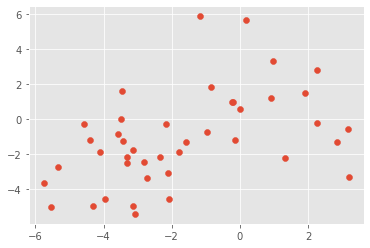

In [30]:
eig_vals,eig_vecs =np.linalg.eig(x_s)
print("2개의 주성분을 사용하여, 분산 설명 비율: ", np.sum(eig_vals[0:2])/np.sum(eig_vals))

PCA=X.dot(eig_vecs[0:2].T)

plt.scatter(PCA.iloc[:,0],PCA.iloc[:,1])
plt.show()

과정.
1. 표본 공분산에서, spectral decomposition 했을때, eigen vector들이 PC Direction이다.
2. eigen value의 누적비율을 통해 분산을 설명하는 비율을 찾을 수 있다. 여기서는 주성분 2개를 사용하면, 95%이상을 설명할 수 있다.
3. PC direction * X 가 주성분이 된다.


## 1-c.

표본상관행렬 R을 이용하여 주성분분석. 1,2번 주성분 설명. 


PC 1,2 Directions :
 [[ 0.23682109 -0.24146701  0.27844514 -0.64347435  0.22357922 -0.56053441
   0.17271949]
 [-0.20556654 -0.01126548 -0.52661387 -0.22446898  0.00570085  0.15613432
   0.7781366 ]]


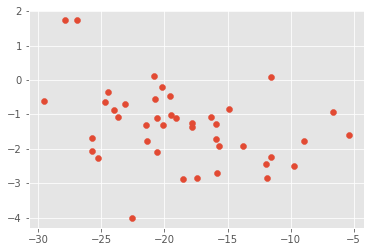

In [36]:
x_R = X.corr()
eig_vals,eig_vecs =np.linalg.eig(x_R)

print('PC 1,2 Directions :\n',eig_vecs[0:2])

PCA=X.dot(eig_vecs[0:2].T)

plt.scatter(PCA.iloc[:,0],PCA.iloc[:,1])
plt.show()

First PC Y1 :
```
0.23682109 * X1 -0.24146701 * X2 + 0.27844514 * X3 -0.64347435 * X4 + 0.22357922 * X5 -0.56053441 * X6 + 0.17271949 * X7
```
Y1은  (X1+X3+X5+X7)과 (X2+X4+X6)의 차를 뜻한다. 


Second PC Y2 :
```
-0.20556654*X1 -0.01126548*X2 -0.52661387*X3 -0.22446898*X4 + 0.00570085*X5 + 0.15613432*X6 + 0.7781366*X7
```

Y2는 (X5+X6+X7)과 (X1,X2,X3,X4)의 차를 뜻한다.


## 1-d.

표본상관행렬 R을 이용하여 주성분분석. 첫 3개의 주성분으로 분산 비율 설명. S를 이용했을 때와 차이 설명




In [43]:
x_R = X.corr()
eig_vals,eig_vecs =np.linalg.eig(x_R)

print("3개의 주성분을 사용하여, 분산 설명 비율: ", np.sum(eig_vals[0:3])/7)


3개의 주성분을 사용하여, 분산 설명 비율:  0.5540974651908922


S를 이용해서 구했을때와 다르다. 이유는, R을 이용한 주성분분석은 표준화된 데이터에서 공분산을 이용해 분석하는것과 같기 때문이다.